In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("train.csv", index_col=0)
test_data = pd.read_csv('test.csv', index_col=0)
sample = pd.read_csv('submit_sample.csv', header=None)
train_data.shape, test_data.shape, sample.shape

((27100, 17), (18050, 16), (18050, 2))

In [2]:
import pandas_profiling
train_data.profile_report()


In [3]:
all_data = pd.concat([train_data, test_data], axis=0)
all_data.shape

(45150, 17)

In [4]:
cols_o = all_data.select_dtypes(include='object').columns.tolist()
cols_o

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [5]:
# train_data['job'].unique()
ordinal_features = {}

for col in cols_o:
    ordinal_features[col] = train_data[col].unique().tolist()
    
ordinal_features

{'job': ['services',
  'entrepreneur',
  'management',
  'technician',
  'unemployed',
  'blue-collar',
  'admin.',
  'retired',
  'self-employed',
  'housemaid',
  'student'],
 'marital': ['married', 'single', 'divorced'],
 'education': ['secondary', 'tertiary', 'primary', 'unknown'],
 'default': ['no', 'yes'],
 'housing': ['yes', 'no'],
 'loan': ['no', 'yes'],
 'contact': ['cellular', 'unknown', 'telephone'],
 'month': ['nov',
  'aug',
  'may',
  'apr',
  'sep',
  'jun',
  'jul',
  'feb',
  'oct',
  'jan',
  'mar'],
 'poutcome': ['other', 'unknown', 'failure', 'success']}

In [6]:
# train_data['job'].unique()
ordinal_features = {}

for col in cols_o:
    ordinal_features[col] = all_data[col].unique().tolist()
    
ordinal_features

{'job': ['services',
  'entrepreneur',
  'management',
  'technician',
  'unemployed',
  'blue-collar',
  'admin.',
  'retired',
  'self-employed',
  'housemaid',
  'student',
  'unknown'],
 'marital': ['married', 'single', 'divorced'],
 'education': ['secondary', 'tertiary', 'primary', 'unknown'],
 'default': ['no', 'yes'],
 'housing': ['yes', 'no'],
 'loan': ['no', 'yes'],
 'contact': ['cellular', 'unknown', 'telephone'],
 'month': ['nov',
  'aug',
  'may',
  'apr',
  'sep',
  'jun',
  'jul',
  'feb',
  'oct',
  'jan',
  'mar'],
 'poutcome': ['other', 'unknown', 'failure', 'success']}

In [7]:
from pycaret.classification import *
# exp = setup(data = train_data,
#             target = 'y',
#             ordinal_features = {'job': ['services', 'entrepreneur', 'management', 'technician', 'unemployed', 'blue-collar', 'admin.', 'retired', 'self-employed', 'housemaid', 'student', 'unknown']},
#             silent=True)

exp = setup(data = train_data,
            target = 'y',
            silent=True,
            ignore_features=['job'],
            session_id=123,
            normalize = True, 
            transformation = True, 
            ignore_low_variance = True,
            remove_multicollinearity = True,
            multicollinearity_threshold = 0.95,)


Setup Succesfully Completed!


In [8]:
exp

(            age   balance       day  duration     pdays  marital_divorced  \
 id                                                                          
 0     -0.780663 -1.117821  0.460243 -0.876305  0.264368               0.0   
 1     -1.552505 -0.148155  0.585082 -0.157812  1.068016               0.0   
 2      0.310008 -1.119145 -0.699385  1.095847  1.554286               0.0   
 3     -0.780663  1.626807 -0.140377  1.776673 -1.242040               0.0   
 4      1.511639 -0.180432 -1.538299  0.039684 -0.629839               0.0   
 ...         ...       ...       ...       ...       ...               ...   
 27095  0.653171 -0.664737  1.227811  1.073781 -0.024740               0.0   
 27096  0.310008 -0.175852  1.227811 -0.602069  1.134767               0.0   
 27097  0.310008 -0.416396  1.359633  0.039684 -1.238030               0.0   
 27098 -1.146592  1.642650  1.227811 -0.602069 -1.322246               0.0   
 27099  0.090458 -1.232471  1.227811  1.073781 -0.438364        

In [9]:
compare_models()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [10]:
dt = create_model('dt', fold = 5)

In [11]:
dt = create_model('dt', fold = 5, round = 2)

In [12]:
rf = create_model('rf')

In [13]:
tuned_rf = tune_model(rf)

In [14]:
tuned_rf2 = tune_model(rf, optimize = 'AUC')

In [15]:
# lets create a simple decision tree model that we will use for ensembling 
dt = create_model('dt')

In [16]:
bagged_dt = ensemble_model(dt)

In [17]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

In [18]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

In [19]:
# tuned_bagged_dt = tune_model(dt, ensemble=True, method='Bagging')

In [20]:
# blend_hard = blend_models()

In [21]:
# blend_soft = blend_models(method = 'soft')

In [22]:
"""
we will create 4 specific models to be passed into blend_models().
Note that verbose is set to False to avoid printing the score grid of individual models.
"""

gbc = create_model('gbc', verbose = False)
dt = create_model('dt', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)
xgboost = create_model('xgboost', verbose = False)

In [23]:
blend_specific_soft = blend_models(estimator_list = [gbc,dt,lightgbm,xgboost], method = 'soft')

In [24]:
blend_specific_hard = blend_models(estimator_list = [gbc,dt,lightgbm,xgboost], method = 'hard')

In [25]:
stack_soft = stack_models([gbc,dt,lightgbm,xgboost])

In [26]:
stack_hard = stack_models([gbc,dt,lightgbm,xgboost], method='hard')

In [27]:
stack_soft2 = stack_models([gbc,dt,lightgbm], meta_model=xgboost)

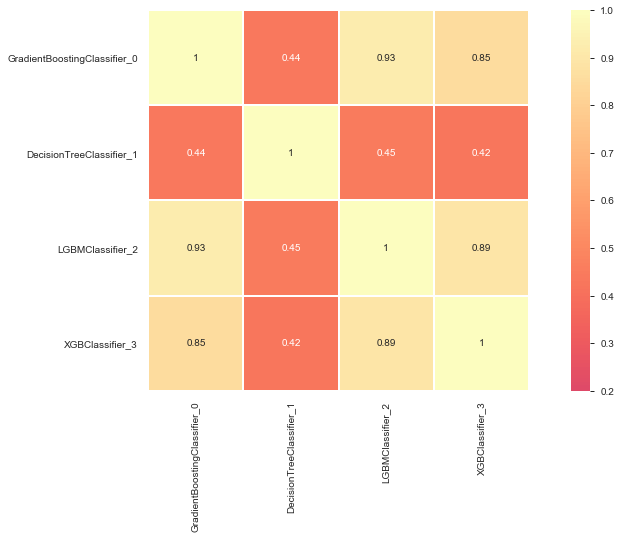

In [28]:
stack_soft_plot = stack_models([gbc,dt,lightgbm,xgboost], plot=True)

In [29]:
rf = create_model('rf')

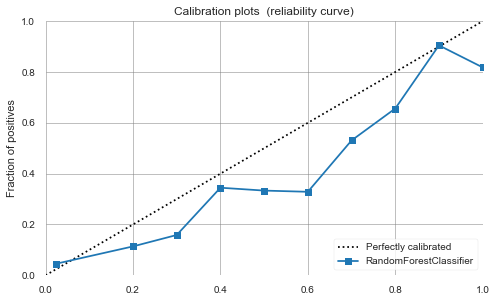

In [30]:
plot_model(rf, plot='calibration')

In [31]:
calibrated_rf = calibrate_model(rf)

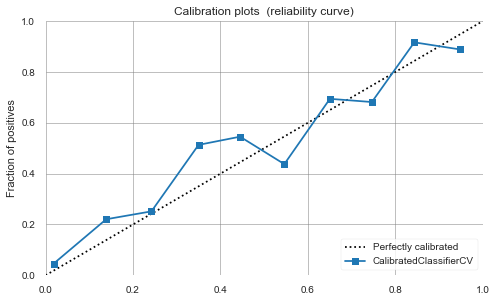

In [32]:
plot_model(calibrated_rf, plot='calibration')

In [33]:
calibrated_rf_isotonic = calibrate_model(rf, method = 'isotonic')

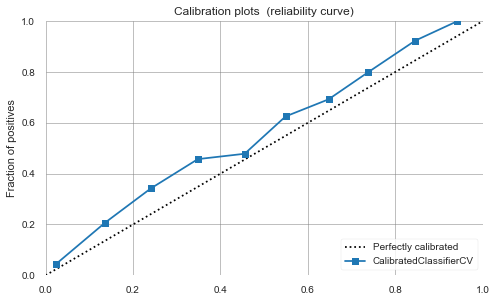

In [34]:
plot_model(calibrated_rf_isotonic, plot='calibration')

In [35]:
predictions = predict_model(stack_soft)
predictions

Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Stacking Classifier    0.9294  0.8189  0.2098  0.6456  0.3167  0.2895   

      MCC  
0  0.3413

age   balance       day  duration     pdays  marital_divorced  \
0     0.090458 -0.489932  1.359633  0.039684  0.702302               0.0   
1    -1.146592 -1.634669 -0.914410  0.741299  1.613019               0.0   
2    -0.780663 -0.123299  0.460243 -0.602069  0.054570               0.0   
3     0.090458 -0.585924 -1.125602  0.741299  0.216911               0.0   
4    -0.453423  1.544334 -0.023818 -0.461566 -1.153857               0.0   
...        ...       ...       ...       ...       ...               ...   
8126 -1.146592  0.102223 -1.639709  2.214953  0.607759               0.0   
8127  0.090458  1.641953  1.227811  1.073781 -0.310900               0.0   
8128  1.815027  0.535176 -1.125602 -0.157812 -0.040612               0.0   
8129 -1.552505  0.250477 -0.023818 -0.201993 -1.338292               0.0   
8130  1.554471  0.739990 -0.590247 -0.876305  0.666857               0.0   

      marital_married  marital_single  education_primary  education_secondary  \
0                 0.0             1.0                0.0                  0.0   
1                 1.0             0.0                0.0                  0.0   
2                 1.0             0.0                0.0                  1.0   
3                 0.0             1.0                0.0                  1.0   
4                 1.0             0.0                0.0                  1.0   
...               ...             ...                ...                  ...   
8126              1.0             0.0                0.0                  1.0   
8127              1.0             0.0                0.0                  1.0   
8128              1.0             0.0                1.0                  0.0   
8129              0.0             1.0                0.0                  1.0   
8130              1.0             0.0                0.0                  1.0   

      ...  campaign_3  campaign_4  campaign_5  poutcome_failure  \
0     ...         0.0         0.0         0.0               0.0   
1     ...         1.0         0.0         0.0               0.0   
2     ...         0.0         0.0         0.0               0.0   
3     ...         1.0         0.0         0.0               0.0   
4     ...         0.0         1.0         0.0               0.0   
...   ...         ...         ...         ...               ...   
8126  ...         0.0         0.0         0.0               0.0   
8127  ...         0.0         0.0         0.0               0.0   
8128  ...         0.0         0.0         0.0               0.0   
8129  ...         1.0         0.0         0.0               0.0   
8130  ...         0.0         0.0         0.0               1.0   

      poutcome_other  poutcome_success  poutcome_unknown  y  Label   Score  
0                0.0               0.0               1.0  0      0  0.0991  
1                0.0               0.0               1.0  0      0  0.0645  
2                0.0               0.0               1.0  0      0  0.0263  
3                0.0               0.0               1.0  0      0  0.0434  
4                1.0               0.0               0.0  0      0  0.0202  
...              ...               ...               ... ..    ...     ...  
8126             0.0               0.0               1.0  0      0  0.0223  
8127             0.0               0.0               1.0  0      0  0.0266  
8128             0.0               0.0               1.0  0      0  0.0625  
8129             0.0               0.0               1.0  0      0  0.2261  
8130             0.0               0.0               0.0  0      0  0.0214  

[8131 rows x 40 columns]

In [36]:
final_stack_soft = finalize_model(stack_soft)

D:\anaconda3\lib\site-packages\pycaret\classification.py:7546: UserWarning:

This function will adopt to Stackingclassifer() from sklearn in future release of PyCaret 2.x.



In [37]:
unseen_predictions = predict_model(final_stack_soft, data=test_data)
unseen_predictions.head()

age         job  marital  education default  balance housing loan  \
0   35  technician   single  secondary      no    89043      no   no   
1   37    services  married  secondary      no    64372     yes   no   
2   31    services   single  secondary      no    31606     yes   no   
3   31      admin.  married  secondary      no    94826     yes   no   
4   32    services  married  secondary      no   100401      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome  Label  \
0  cellular    7   feb       101         2    184         2  success      1   
1  cellular    7   jul       158         3    241         0  unknown      0   
2   unknown   15   may       152         2     47         0  unknown      0   
3  cellular   27   may       345         2    490         0  unknown      0   
4  cellular    7   jan       126         1    686         0    other      0   

    Score  
0  0.9135  
1  0.0493  
2  0.0357  
3  0.0210  
4  0.0744

In [38]:
unseen_predictions

age            job  marital  education default  balance housing loan  \
0       35     technician   single  secondary      no    89043      no   no   
1       37       services  married  secondary      no    64372     yes   no   
2       31       services   single  secondary      no    31606     yes   no   
3       31         admin.  married  secondary      no    94826     yes   no   
4       32       services  married  secondary      no   100401      no   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
18045   49  self-employed  married   tertiary      no    98357     yes   no   
18046   34    blue-collar  married  secondary      no    29621     yes   no   
18047   34         admin.   single  secondary      no    94260     yes   no   
18048   31     technician   single  secondary      no    65483     yes   no   
18049   30        retired  married    primary      no     6474      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0      cellular    7   feb       101         2    184         2  success   
1      cellular    7   jul       158         3    241         0  unknown   
2       unknown   15   may       152         2     47         0  unknown   
3      cellular   27   may       345         2    490         0  unknown   
4      cellular    7   jan       126         1    686         0    other   
...         ...  ...   ...       ...       ...    ...       ...      ...   
18045  cellular    6   jul       101         2    417         0  failure   
18046  cellular   12   may       345         1    815         0  unknown   
18047   unknown   16   may       121         2    370         0  unknown   
18048   unknown   15   may       345         2     41         0  unknown   
18049  cellular   13   aug       158         1    699         0  unknown   

       Label   Score  
0          1  0.9135  
1          0  0.0493  
2          0  0.0357  
3          0  0.0210  
4          0  0.0744  
...      ...     ...  
18045      0  0.0213  
18046      0  0.0274  
18047      0  0.0422  
18048      0  0.0281  
18049      0  0.0679  

[18050 rows x 18 columns]

In [39]:
from matplotlib import pyplot as plt
%matplotlib inline

In [52]:
predictions.shape[0]//1000, predictions.shape[0]

(8, 8131)

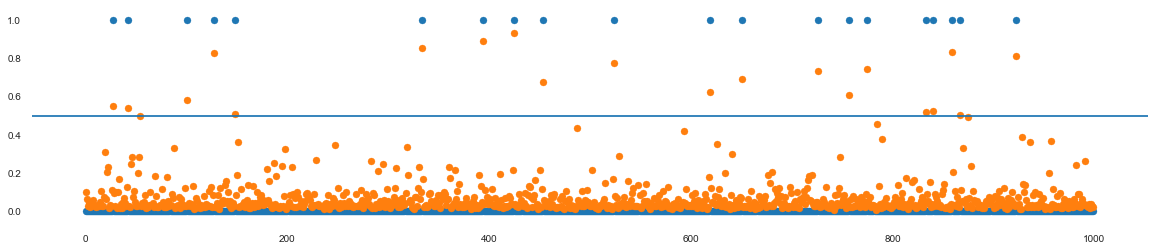

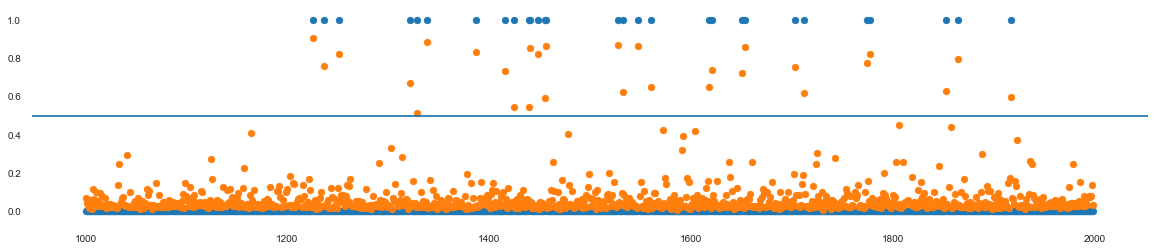

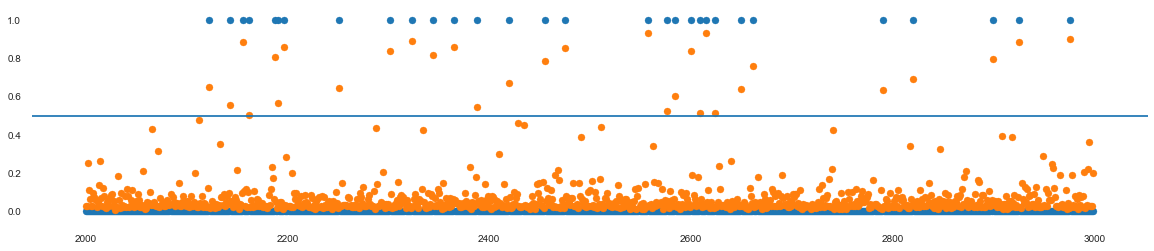

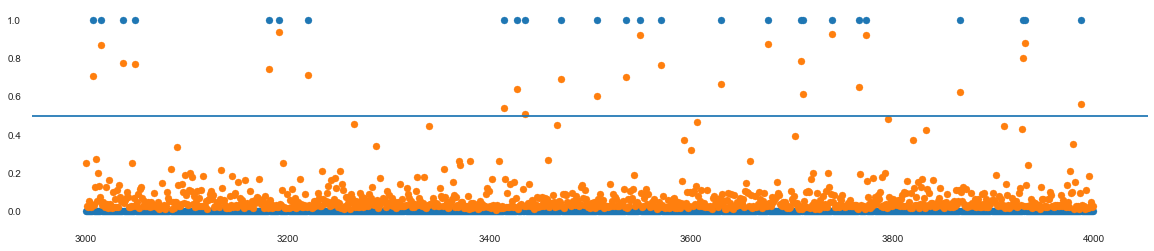

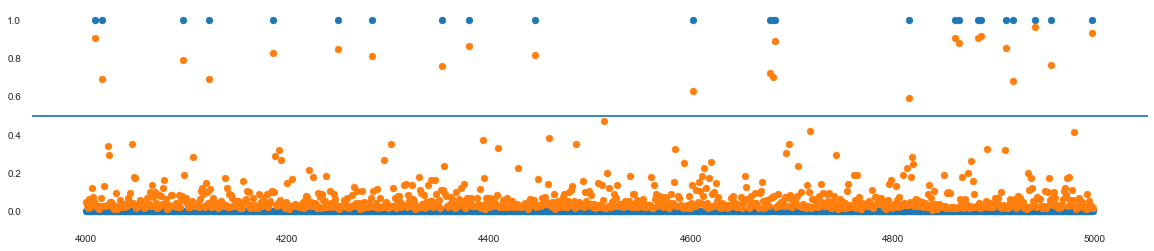

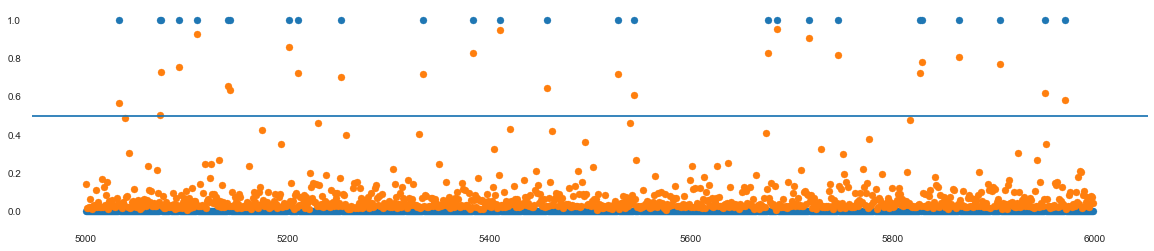

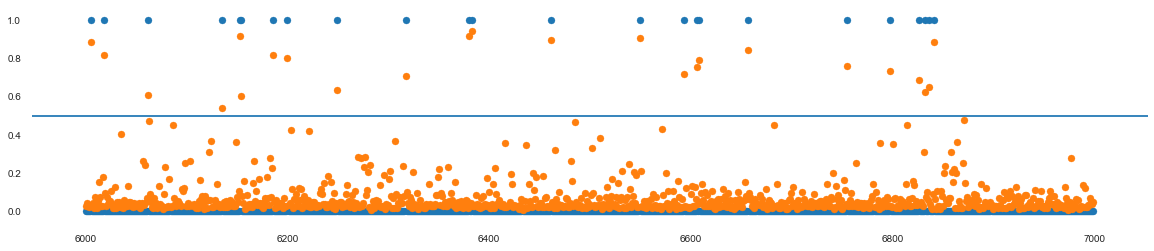

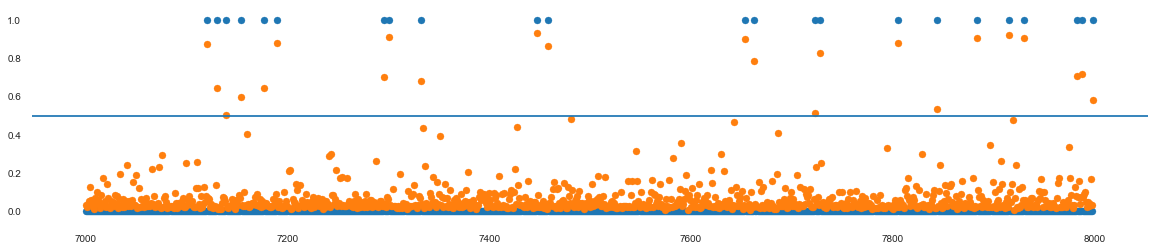

In [53]:
for i in list(range(8)):
    plt.figure(figsize=(20,4))
    plt.scatter(predictions.index[i*1000:i*1000+1000], predictions['Label'][i*1000:i*1000+1000])
    plt.scatter(predictions.index[i*1000:i*1000+1000], predictions['Score'][i*1000:i*1000+1000])
    plt.axhline(y=0.5)
    plt.show()

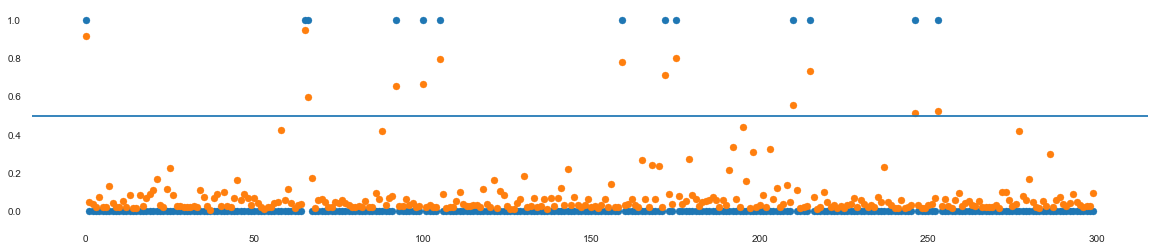

In [41]:
plt.figure(figsize=(20,4))
plt.scatter(unseen_predictions.index[:300], unseen_predictions['Label'][:300])
plt.scatter(unseen_predictions.index[:300], unseen_predictions['Score'][:300])
plt.axhline(y=0.5)
plt.show()

In [42]:
sample[1] = unseen_predictions['Score']
sample

0       1
0          0  0.9135
1          1  0.0493
2          2  0.0357
3          3  0.0210
4          4  0.0744
...      ...     ...
18045  18045  0.0213
18046  18046  0.0274
18047  18047  0.0422
18048  18048  0.0281
18049  18049  0.0679

[18050 rows x 2 columns]

In [43]:
sample.to_csv('submit_20200811.csv', header=None, index=None)

In [44]:
top5 = compare_models(n_select = 5, sort = 'AUC', )

IntProgress(value=0, description='Processing: ', max=180)

Initiated  . . . . . . . . . . . . . . . . . .                22:53:35
Status     . . . . . . . . . . . . . . . . . .    Fitting Fold 2 of 10
Estimator  . . . . . . . . . . . . . . . . . .     CatBoost Classifier
ETC        . . . . . . . . . . . . . . . . . .  1.54 Minutes Remaining

Model  Accuracy     AUC  Recall   Prec.      F1  \
0      Gradient Boosting Classifier    0.9309  0.8358  0.1942  0.7032  0.3030   
1              Ada Boost Classifier    0.9299  0.8306  0.1888  0.6833  0.2949   
2   Light Gradient Boosting Machine    0.9303  0.8291  0.2050  0.6709  0.3125   
3         Extreme Gradient Boosting    0.9271  0.8165  0.2111  0.5912  0.3103   
4               Logistic Regression    0.9304  0.7960  0.1800  0.7162  0.2868   
5      Linear Discriminant Analysis    0.9278  0.7933  0.2260  0.6032  0.3282   
6            Extra Trees Classifier    0.9256  0.7769  0.2057  0.5682  0.3005   
7                       Naive Bayes    0.9014  0.7614  0.3200  0.3545  0.3359   
8          Random Forest Classifier    0.9275  0.7513  0.1699  0.6283  0.2665   
9            K Neighbors Classifier    0.9209  0.6646  0.0812  0.4546  0.1373   
10  Quadratic Discriminant Analysis    0.6650  0.6554  0.5453  0.1340  0.2060   
11         Decision Tree Classifier    0.8803  0.6121  0.2943  0.2620  0.2770   
12              SVM - Linear Kernel    0.9284  0.0000  0.1482  0.6885  0.2431   
13                 Ridge Classifier    0.9287  0.0000  0.1563  0.6894  0.2537   

     Kappa     MCC  TT (Sec)  
0   0.2790  0.3449    2.5895  
1   0.2704  0.3342    0.7903  
2   0.2868  0.3444    0.2394  
3   0.2809  0.3234    1.0587  
4   0.2637  0.3355    0.1637  
5   0.2982  0.3392    0.0922  
6   0.2702  0.3104    0.4999  
7   0.2829  0.2835    0.0171  
8   0.2416  0.3005    0.1203  
9   0.1167  0.1665    0.2215  
10  0.0947  0.1322    0.0264  
11  0.2120  0.2126    0.1273  
12  0.2217  0.2966    0.0827  
13  0.2317  0.3048    0.0215

KeyboardInterrupt: 

In [ ]:
tuned_top5 = [tune_model(i, n_iter = 50, optimize = 'AUC') for i in top5]


In [ ]:
stacked_models = stack_models(estimator_list = top5[1:], meta_model = top5[0])


In [ ]:
final_model = finalize_model(stack)

In [ ]:
pred = predict_model(final_model)
pred